In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls

In [2]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [3]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'PISA'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
batch='PISA'

In [4]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_PISA_with_Pons.npy', 
                                   allow_pickle=True).item()

# reformat dictionary and subjects
old_keys = list(dict_results_across_mice.keys())
for key in old_keys:
    group = key.split('_')[-1] if key.split('_')[-1][-1]!='2' else key.split('_')[-1][:-1]
    number = key.split('_')[0]
    new_key = 'BL'+number+group
    dict_results_across_mice[new_key] = dict_results_across_mice[key]
    del dict_results_across_mice[key]
    
#remove BL12_noshock due to biased number of cells
del dict_results_across_mice['BL12noshock']
subjects = list(dict_results_across_mice.keys())

In [5]:
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)

In [6]:
dict_results_across_mice.keys()

dict_keys(['BL13noshock', 'BL4demonstrator', 'BL9demonstrator', 'BL2observer', 'BL17demonstrator', 'BL22demonstrator', 'BL1noshock', 'BL20noshock', 'BL19noshock', 'BL16observer', 'BL15noshock', 'BL10observer', 'BL11noshock', 'BL6demonstrator', 'BL7noshock', 'BL14demonstrator', 'BL3demonstrator', 'BL5observer', 'BL18observer', 'BL8observer', 'BL21observer'])

In [7]:
# # remove one group
# removed = []
# for subject in dict_results_across_mice.keys():
#     if subject.split('_')[0] in ['BL'+str(i) for i in range(9,17)]:
#         removed.append(subject)
# for key in removed:
#     del dict_results_across_mice[key]

In [8]:
# dict_results_across_mice.keys()

# Format data for task PLS

In [9]:
data_ncells = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='n_cells')
data_energy = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='energy')
data_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                    batch=batch, table='density')
data_relative_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                             batch=batch, table='relative_density')
data_ncells.dropna(inplace=True, axis=1)
data_energy.dropna(inplace=True, axis=1)
data_density.dropna(inplace=True, axis=1)
data_relative_density.dropna(inplace=True, axis=1)
data_ncells.to_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy.to_csv('./results_pls/'+batch+'_energy.csv')
data_density.to_csv('./results_pls/'+batch+'_density.csv')
data_relative_density.to_csv('./results_pls/'+batch+'_relative_density.csv')

# Format data for hierarchy plotting

In [10]:
df_levels = upls.create_df_levels(volumes)

# Apply task PLS

In [11]:
%%bash
python area_pls.py -i results_pls/PISA_n_cells.csv -o './results_pls/PISA_ncells'

In [12]:
%%bash
python area_pls.py -i results_pls/PISA_energy.csv -o './results_pls/PISA_energy'

In [13]:
%%bash
python area_pls.py -i results_pls/PISA_density.csv -o './results_pls/PISA_density'

In [14]:
%%bash
python area_pls.py -i results_pls/PISA_relative_density.csv -o './results_pls/PISA_relative_density'

# PLS ncells

In [15]:
contrasts = pd.read_csv('./results_pls/PISA_ncells_contrasts.csv')
saliences = pd.read_csv('./results_pls/PISA_ncells_saliences.csv')
contrasts = contrasts.rename(columns={"group_noshock": "noshock", 
                                      "group_demonstrator": "demonstrator", 
                                      "group_observer":"observer"})

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

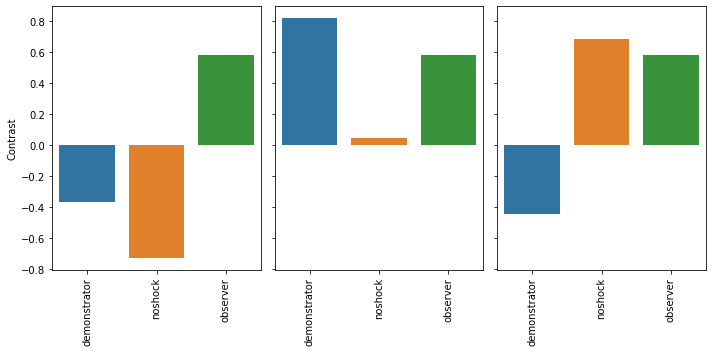

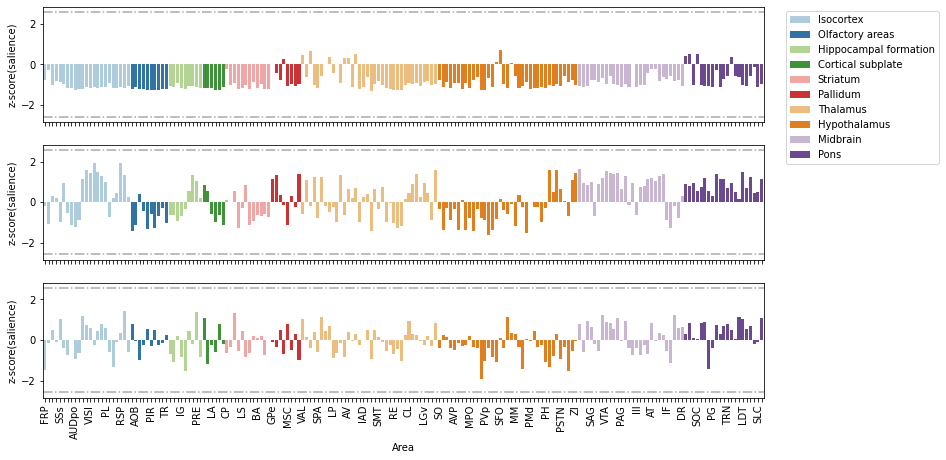

In [16]:
upls.plot_panel_contrasts(batch=batch, variable='ncells')
upls.plot_panel_saliences(batch=batch, variable='ncells', df_levels=df_levels)

# PLS energy

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

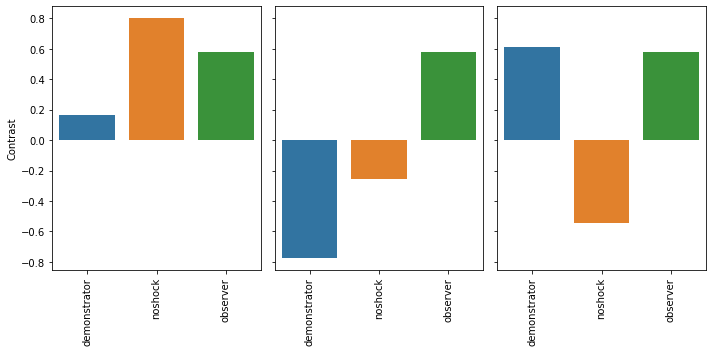

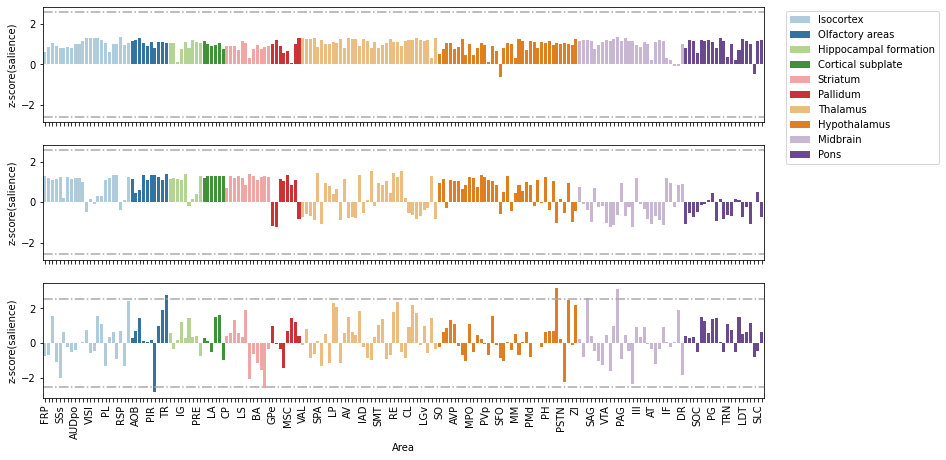

In [17]:
upls.plot_panel_contrasts(batch=batch, variable='energy')
upls.plot_panel_saliences(batch=batch, variable='energy', df_levels=df_levels)


# PLS density

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

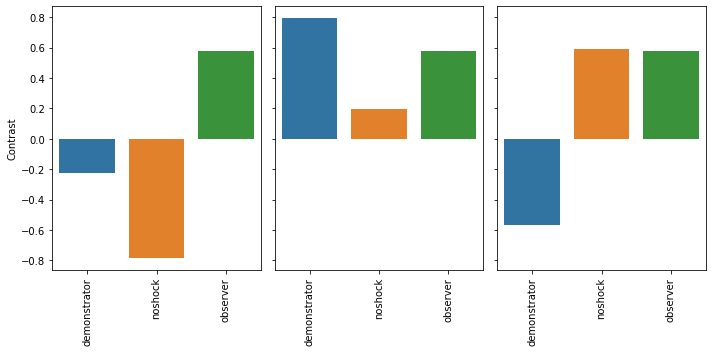

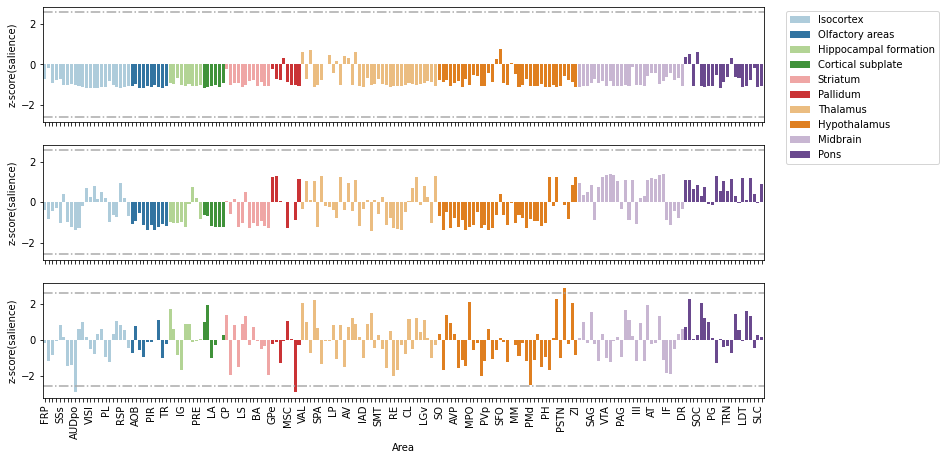

In [18]:
upls.plot_panel_contrasts(batch=batch, variable='density')
upls.plot_panel_saliences(batch=batch, variable='density', df_levels=df_levels)

# PLS relative density

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

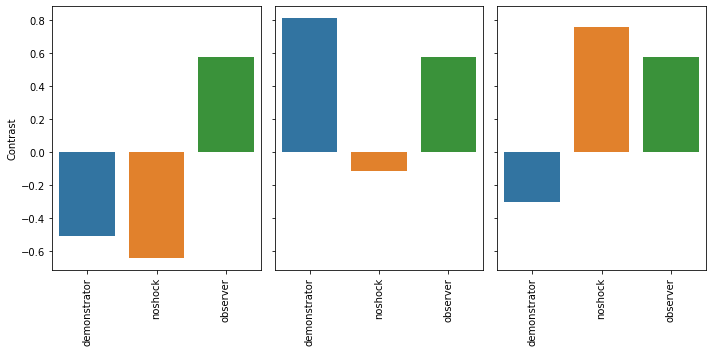

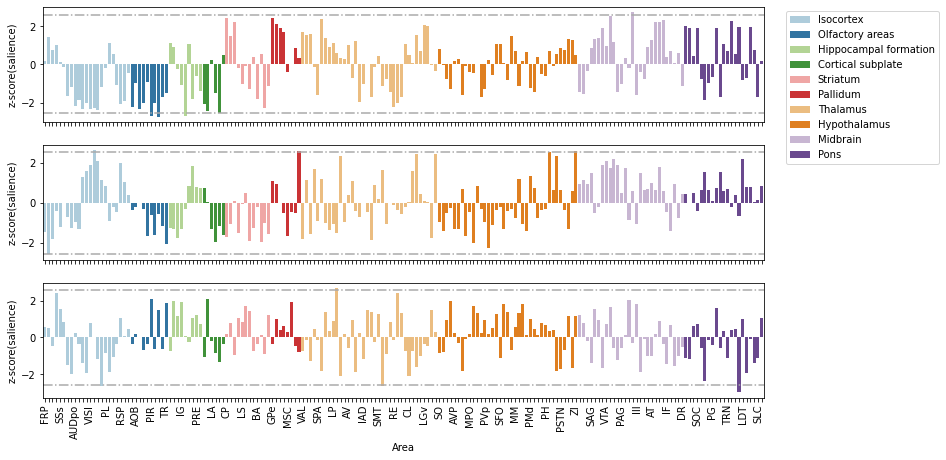

In [19]:
upls.plot_panel_contrasts(batch=batch, variable='relative_density')
upls.plot_panel_saliences(batch=batch, variable='relative_density', df_levels=df_levels)

# Identify areas with significant area contribution

In [20]:
batch='PISA'
overlap = {'ncells':[], 'energy':[], 'density':[], 'relative_density':[]}
for variable in overlap.keys():
    overlap[variable] = set(upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=1.96, 
                                           volumes=volumes))
[len(overlap[key]) for key in overlap.keys()]

[0, 17, 14, 61]

In [21]:
overlap['relative_density']

{'Anterior cingulate area',
 'Anterior olfactory nucleus',
 'Anterodorsal preoptic nucleus',
 'Anterolateral visual area',
 'Anteromedial visual area',
 'Basolateral amygdalar nucleus',
 'Basomedial amygdalar nucleus',
 'Bed nucleus of the anterior commissure',
 'Caudoputamen',
 'Central amygdalar nucleus',
 'Central lateral nucleus of the thalamus',
 'Claustrum',
 'Cortical amygdalar area',
 'Cuneiform nucleus',
 'Dentate gyrus',
 'Dorsal tegmental nucleus',
 'Endopiriform nucleus',
 'Entorhinal area',
 'Fundus of striatum',
 'Globus pallidus external segment',
 'Globus pallidus internal segment',
 'Interanteromedial nucleus of the thalamus',
 'Intercalated amygdalar nucleus',
 'Lateral habenula',
 'Lateral hypothalamic area',
 'Lateral terminal nucleus of the accessory optic tract',
 'Lateral visual area',
 'Laterodorsal tegmental nucleus',
 'Locus ceruleus',
 'Main olfactory bulb',
 'Midbrain reticular nucleus',
 'Midbrain reticular nucleus retrorubral area',
 'Motor nucleus of trig

# Task PLS only on two groups: Observer e demonstrator

In [33]:
relative_density_obs_dem = pd.concat([data_relative_density.groupby('group').get_group('observer'),
          data_relative_density.groupby('group').get_group('demonstrator')])
relative_density_obs_dem.dropna(inplace=True, axis=1)
batch = 'PISA_obs_dem'
relative_density_obs_dem.to_csv('./results_pls/'+batch+'_relative_density.csv')

In [34]:
%%bash
python area_pls.py -i results_pls/PISA_obs_dem_relative_density.csv -o './results_pls/PISA_obs_dem_relative_density'

(<Figure size 936x504 with 2 Axes>,
 array([<AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

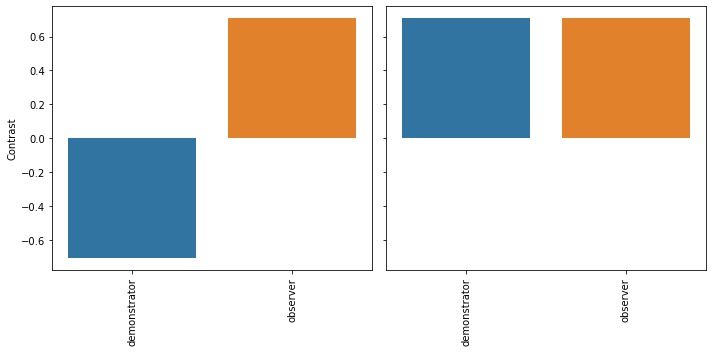

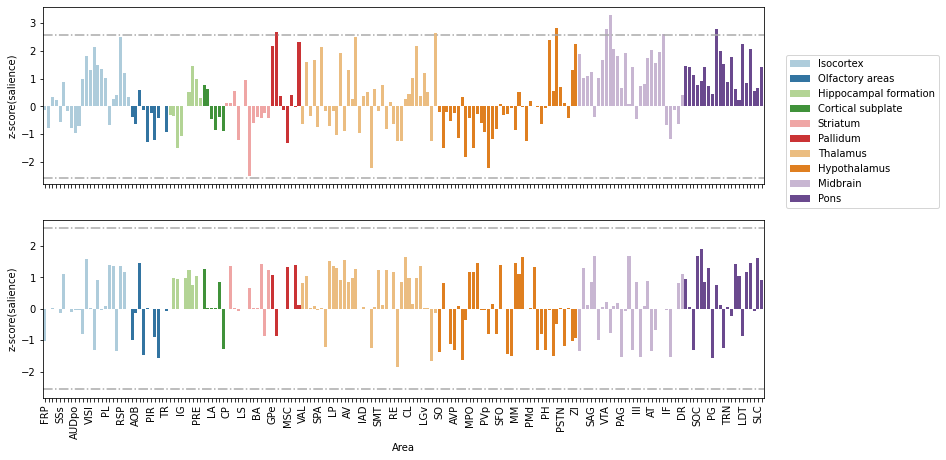

In [35]:
upls.plot_panel_contrasts(batch=batch, variable='density')
upls.plot_panel_saliences(batch=batch, variable='density', df_levels=df_levels)

In [36]:
variable='relative_density'
observer_vs_demonstrator = upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=2.56, 
                                           volumes=volumes)

In [37]:
overlap['relative_density']

{'Anterior cingulate area',
 'Anterior olfactory nucleus',
 'Anterodorsal preoptic nucleus',
 'Anterolateral visual area',
 'Anteromedial visual area',
 'Basolateral amygdalar nucleus',
 'Basomedial amygdalar nucleus',
 'Bed nucleus of the anterior commissure',
 'Caudoputamen',
 'Central amygdalar nucleus',
 'Central lateral nucleus of the thalamus',
 'Claustrum',
 'Cortical amygdalar area',
 'Cuneiform nucleus',
 'Dentate gyrus',
 'Dorsal tegmental nucleus',
 'Endopiriform nucleus',
 'Entorhinal area',
 'Fundus of striatum',
 'Globus pallidus external segment',
 'Globus pallidus internal segment',
 'Interanteromedial nucleus of the thalamus',
 'Intercalated amygdalar nucleus',
 'Lateral habenula',
 'Lateral hypothalamic area',
 'Lateral terminal nucleus of the accessory optic tract',
 'Lateral visual area',
 'Laterodorsal tegmental nucleus',
 'Locus ceruleus',
 'Main olfactory bulb',
 'Midbrain reticular nucleus',
 'Midbrain reticular nucleus retrorubral area',
 'Motor nucleus of trig

In [41]:
len(set(observer_vs_demonstrator).intersection(overlap['relative_density']))

13

In [43]:
observer_vs_demonstrator

array(['Basolateral amygdalar nucleus',
       'Bed nucleus of the anterior commissure',
       'Globus pallidus external segment',
       'Globus pallidus internal segment', 'Lateral habenula',
       'Lateral hypothalamic area',
       'Midbrain reticular nucleus retrorubral area',
       'Periventricular hypothalamic nucleus preoptic part',
       'Posterior limiting nucleus of the thalamus',
       'Postpiriform transition area', 'Preparasubthalamic nucleus',
       'Reticular nucleus of the thalamus', 'Zona incerta'], dtype='<U50')